In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("PM10_PM25_ylityspäivät_2024.csv")
routes = pd.read_csv("../data/brushing_data.csv")
import datetime
import warnings
warnings.filterwarnings('ignore')
routes["endTime"] = pd.to_datetime(routes["endTime"])
routes["startTime"] = pd.to_datetime(routes["startTime"])
duration_hours = (routes["endTime"] - routes["startTime"]).dt.total_seconds() / 3600

duration_by_day = duration_hours.groupby(routes['endTime'].dt.to_period('d')).sum()
duration_by_hour = duration_hours.groupby(routes['endTime'].dt.to_period('h')).sum()

durations = duration_hours.groupby(routes['endTime']).sum()
duration_by_day.index = duration_by_day.index.to_timestamp()
duration_by_hour.index = duration_by_hour.index.to_timestamp()

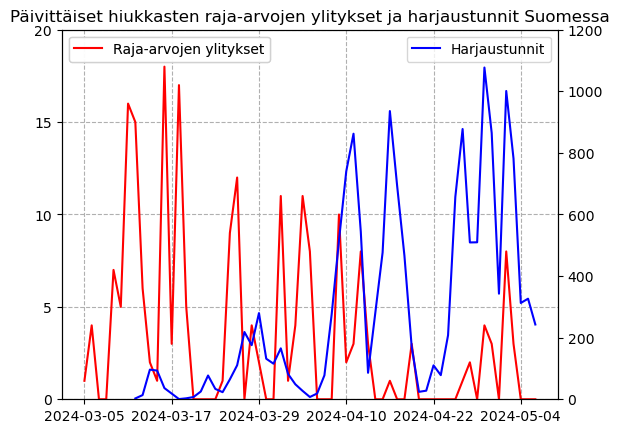

In [31]:
idx = pd.date_range('03-05-2024', '05-06-2024')
df["Date"] = pd.to_datetime(df["Päivämäärä"], dayfirst=True)

day_counts = df.value_counts("Date").sort_index()
day_counts.index = pd.DatetimeIndex(day_counts.index)

day_counts = day_counts.reindex(idx, fill_value=0)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(day_counts, label="Raja-arvojen ylitykset", color="red")
ax2.plot(duration_by_day, label="Harjaustunnit", color="blue")
legend1 = ax1.legend(loc='upper left')
legend2 = ax2.legend(loc='upper right')
ax1.add_artist(legend1)
ax1.grid(linestyle="dashed")

xticks = day_counts.index[::12]
ax1.set_xticks(xticks)
ax1.set_yticks([0,5,10,15,20])
ax1.set_ylim(0,20)
ax2.set_ylim(0,1200)
plt.title("Päivittäiset hiukkasten raja-arvojen ylitykset ja harjaustunnit Suomessa")
plt.show()


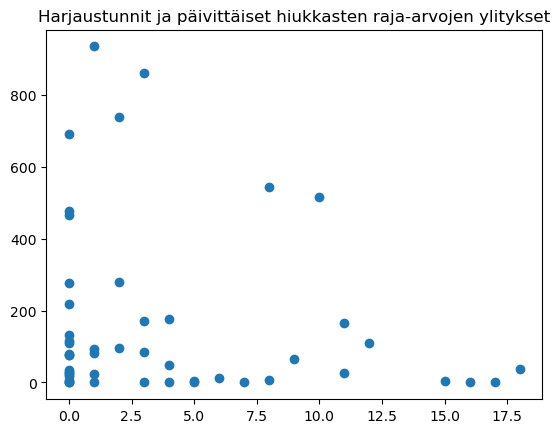

In [4]:
duration_by_day = duration_by_day.reindex(idx, fill_value=0)
plt.scatter(day_counts, duration_by_day)
plt.title("Harjaustunnit ja päivittäiset hiukkasten raja-arvojen ylitykset")
plt.show()

In [5]:
#Valtakunnallisella tasolla harjaustunneilla 
#ja raja-arvojen ylittymisellä heikko negatiivinen korrelaatio
duration_by_day.corr(day_counts)

-0.1443758135632119

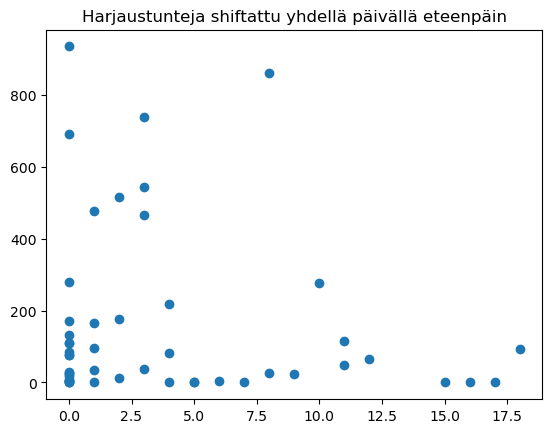

In [6]:
#Shiftaus yhdellä päivällä, ei huomattavaa muutosta
shifted_duration_by_day = duration_by_day.shift(periods=1, fill_value=0)
plt.scatter(day_counts, shifted_duration_by_day)
plt.title("Harjaustunteja shiftattu yhdellä päivällä eteenpäin")
plt.show()

In [7]:
shifted_duration_by_day.corr(day_counts)

-0.12062125193739859

In [8]:
# Raja-arvojen ylittymisen ja lähellä sijaitsevien harjausreittien määrän korrelaatio
# Ei ole välttämättä kovin luotettava
number_of_routes = pd.read_csv("../data/stations_and_number_of_routes.csv")

In [9]:
# Eniten ylittymisiä 
df.value_counts("Mittauspaikka").head(5)

Mittauspaikka
Pori Paanakedonkatu            18
Vantaa Hämeenlinnanväylä       18
Kuopio Tasavallankatu          16
Pietarsaari Bottenviksvägen    16
Helsinki Mäkelänkatu           16
Name: count, dtype: int64

In [10]:
# Eniten harjausreittejä 100m säteellä
number_of_routes.sort_values("Reitit(100m)", ascending=False).head(5)

,Nimi,FMSID,LPNN,WMO,Lat,Lon,Korkeus,Ryhmät,Alkaen,geometry,buffer1000,buffer500,buffer100,Reitit(1000m),Reitit(500m),Reitit(100m)
156,Vantaa Kehä III Varisto,104076,NaN,NaN,60.28,24.82,32.0,ilmanlaatu (kaupungit),2013,POINT (379448.40550593595 6684586.885458249),POLYGON ((380448.40550593595 6684586.885458249...,POLYGON ((379948.40550593595 6684586.885458249...,POLYGON ((379548.40550593595 6684586.885458249...,299,162,90
155,Vantaa Jätevoimala,104085,NaN,NaN,60.26,25.14,NaN,ilmanlaatu (kaupungit),2014,POINT (397077.8230533641 6681818.108709934),"POLYGON ((398077.8230533641 6681818.108709934,...","POLYGON ((397577.8230533641 6681818.108709934,...","POLYGON ((397177.8230533641 6681818.108709934,...",379,164,60
55,Imatra Teppanala,103122,NaN,NaN,61.15,28.81,62.0,ilmanlaatu (kaupungit),1994,POINT (597424.7393790593 6780843.235881047),"POLYGON ((598424.7393790593 6780843.235881047,...","POLYGON ((597924.7393790593 6780843.235881047,...","POLYGON ((597524.7393790593 6780843.235881047,...",96,63,20
105,Lohja Moisio,107543,NaN,NaN,60.25,24.08,48.0,ilmanlaatu (kaupungit),2021,POINT (338395.0696521125 6682830.038582914),"POLYGON ((339395.0696521125 6682830.038582914,...","POLYGON ((338895.0696521125 6682830.038582914,...","POLYGON ((338495.0696521125 6682830.038582914,...",102,58,19
63,Kaarina Kaarina,100823,NaN,NaN,60.41,22.38,13.0,ilmanlaatu (kaupungit),2004,POINT (245643.72694571174 6705998.061883095),POLYGON ((246643.72694571174 6705998.061883095...,POLYGON ((246143.72694571174 6705998.061883095...,POLYGON ((245743.72694571174 6705998.061883095...,232,134,19


In [11]:
# Raja-arvojen ylitykset osaksi reittien määriä sisältävää dataframea

counts = df.value_counts("Mittauspaikka")


# counts.values[10]

number_of_routes["count"] = 0



for i in range(len(number_of_routes)):
    for x in range(len(counts)):
        if counts.index[x] == number_of_routes["Nimi"].iloc[i]:
            number_of_routes["count"].iloc[i] = counts.values[x]

#Tarkasta toiminta
number_of_routes[["Nimi", "count", "Reitit(100m)", "Reitit(500m)", "Reitit(1000m)"]].sort_values("count", ascending=False).head(5)


,Nimi,count,Reitit(100m),Reitit(500m),Reitit(1000m)
117,Pori Paanakedonkatu,18,0,4,8
154,Vantaa Hämeenlinnanväylä,18,0,91,802
116,Pietarsaari Bottenviksvägen,16,0,12,91
89,Kuopio Tasavallankatu,16,0,0,0
37,Helsinki Mäkelänkatu,16,0,0,28


In [12]:
df = df[df["Mittausverkko"].str.contains("Kuopion") == False]
df = df[df["Mittausverkko"].str.contains("Oulun") == False]


counts = df.value_counts("Mittauspaikka")


# counts.values[10]

number_of_routes["count"] = 0



for i in range(len(number_of_routes)):
    for x in range(len(counts)):
        if counts.index[x] == number_of_routes["Nimi"].iloc[i]:
            number_of_routes["count"].iloc[i] = counts.values[x]

#Tarkasta toiminta
number_of_routes[["Nimi", "count", "Reitit(100m)", "Reitit(500m)", "Reitit(1000m)"]].sort_values("count", ascending=False).head(5)

,Nimi,count,Reitit(100m),Reitit(500m),Reitit(1000m)
154,Vantaa Hämeenlinnanväylä,18,0,91,802
117,Pori Paanakedonkatu,18,0,4,8
37,Helsinki Mäkelänkatu,16,0,0,28
116,Pietarsaari Bottenviksvägen,16,0,12,91
20,Espoo Leppävaara Läkkisepänkuja,9,4,38,107


In [13]:
#Korrelaatio 100m alueella sijaitseviin reitteihin
number_of_routes["count"].corr(number_of_routes["Reitit(100m)"], method="pearson")

-0.03869906187199393

In [14]:
#Korrelaatio 500m alueella sijaitseviin reitteihin
number_of_routes["count"].corr(number_of_routes["Reitit(500m)"], method="pearson")

0.039580006410780286

In [15]:
#Korrelaatio 1000m alueella sijaitseviin reitteihin
print(f"Korrelaatio 1000m alueella sijaitseviin reitteihin: {number_of_routes['count'].corr(number_of_routes['Reitit(1000m)'], method='pearson')}")

Korrelaatio 1000m alueella sijaitseviin reitteihin: 0.23653476813727548


In [16]:
# Todella heikko korrelaatio 1000m säteellä.

#Suodatetaan pois asemat joilla raja-arvo ei ole koskaan ylittynyt

more_than_zero = number_of_routes[(number_of_routes["count"] > 0)]


print(f'Korrelaatio havaintoasemilla, joissa raja-arvo on ylittynyt: {more_than_zero["count"].corr(more_than_zero["Reitit(1000m)"], method="pearson")}')
# Toinen todella heikko korrelaatio

Korrelaatio havaintoasemilla, joissa raja-arvo on ylittynyt: 0.38041961353221876


In [17]:
more_than_zero["count"].corr(more_than_zero["Reitit(500m)"], method="pearson")

0.15667699191280085

In [18]:
more_than_zero["count"].corr(more_than_zero["Reitit(100m)"], method="pearson")

-0.07127948308318728

In [19]:
# Suodatetaan pois myös asemat joiden lähellä ei ole yhtään reittiä

more_than_zero_and_routes = more_than_zero[(more_than_zero["Reitit(1000m)"] > 0)]

print(f'Raja-arvoja ylittäneet havaintoasemat, joiden lähellä on reittejä: {more_than_zero_and_routes["count"].corr(more_than_zero_and_routes["Reitit(1000m)"])}')

Raja-arvoja ylittäneet havaintoasemat, joiden lähellä on reittejä: 0.33060267409957006


In [20]:
more_than_zero_and_routes["count"].corr(more_than_zero_and_routes["Reitit(500m)"])

0.04457769979140918

In [21]:
more_than_zero_and_routes["count"].corr(more_than_zero_and_routes["Reitit(100m)"])

-0.16016152546459383

In [22]:
# Ei selkeää korrelaatiota millään menetelmällä

# Kokeilu boolean arvoilla

boolean = number_of_routes

boolean["boolean_1000"] = boolean["Reitit(1000m)"] > 0
boolean["boolean_1000"].corr(boolean["count"])

0.13013880814704556

In [23]:
boolean["boolean_500"] = boolean["Reitit(500m)"] > 0
boolean["boolean_500"].corr(boolean["count"])

0.12453670714983382

In [24]:
boolean["boolean_100"] = boolean["Reitit(100m)"] > 0
boolean["boolean_100"].corr(boolean["count"])

0.013632643677233094

In [25]:
more_than_zero_and_routes[["Nimi", "Reitit(1000m)", "Reitit(500m)", "Reitit(100m)"]].sort_values("Reitit(500m)").head(5)

,Nimi,Reitit(1000m),Reitit(500m),Reitit(100m)
102,Lappeenranta Tirilä Pekkasenkatu,82,0,0
37,Helsinki Mäkelänkatu,28,0,0
159,Vantaa Tikkurila Neilikkatie,189,0,0
92,Lahti Laune Pohjoinen Liipolankatu,4,0,0
69,Kokkola Ykspihlaja,12,0,0


In [26]:
export = more_than_zero_and_routes
export.to_csv("stations_with_routes.csv", index=False)